<a href="https://colab.research.google.com/github/afanasevkirill/social-sna/blob/main/sna_afanasiev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata

!git clone https://github.com/stivalaa/ALAAMEE.git

import os
os.chdir("/content/ALAAMEE/python")

import getopt
import sys
from functools import partial

from conditionalALAAMsampler import conditionalALAAMsampler
from changeStatisticsALAAM import *
import estimateALAAMSA

fatal: destination path 'ALAAMEE' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv(userdata.get('IMPORT_LINK'))

In [ ]:
df.columns = ['participant.id_in_session', 'participant.code', 'participant.label',
       'participant._is_bot', 'participant._index_in_pages',
       'participant._max_page_index', 'participant._current_app_name',
       'participant._current_page_name', 'participant.time_started_utc',
       'participant.visited', 'participant.mturk_worker_id',
       'participant.mturk_assignment_id', 'participant.payoff',
       'participant.auth_success', 'inviter',
       'inviter_dec', 'recipient',
       'recipient_dec', 'participant.username', 'session.code',
       'session.label', 'session.mturk_HITId', 'session.mturk_HITGroupId',
       'session.comment', 'session.is_demo', 'session.config.name',
       'session.config.participation_fee',
       'session.config.real_world_currency_per_point',
       'id_in_group',
       'role', 'payoff',
       'random_decision',
       'mode_answer',
       'city',
       'engagement_1',
       'engagement_2',
       'ee_1', 'ee_2',
       'ident_1',
       'ident_2',
       'ident_3',
       'nature', 'pnb_1',
       'pnb_2', 'ne_1',
       'ne_2',
       'coordination_game.1.group.id_in_subsession',
       'coordination_game.1.subsession.round_number',
       'survey.1.player.id_in_group', 'survey.1.player.role',
       'survey.1.player.payoff', 'survey.1.player.age',
       'survey.1.player.gender', 'survey.1.player.birth',
       'survey.1.player.childhood', 'survey.1.player.work_field',
       'survey.1.player.study_field', 'survey.1.player.education',
       'survey.1.player.risk', 'survey.1.player.income',
       'survey.1.player.life_satisfaction', 'survey.1.player.trust',
       'survey.1.player.freedom_of_choice', 'survey.1.player.feedback',
       'survey.1.player.phone', 'survey.1.player.name', 'survey.1.player.bank',
       'survey.1.group.id_in_subsession', 'survey.1.subsession.round_number',
       'final.1.player.id_in_group', 'final.1.player.role',
       'final.1.player.payoff', 'final.1.group.id_in_subsession',
       'final.1.subsession.round_number']

In [ ]:
df = df.dropna(axis=0,subset=['inviter_dec','recipient_dec','engagement_1',
       'engagement_2', 'ee_1', 'ee_2', 'ident_1', 'ident_2', 'ident_3',
       'nature', 'pnb_1', 'pnb_2', 'ne_1', 'ne_2'])
df = df.dropna(axis=0,subset=['engagement_1',
       'engagement_2', 'ee_1', 'ee_2', 'ident_1', 'ident_2', 'ident_3',
       'nature', 'pnb_1', 'pnb_2', 'ne_1', 'ne_2'])


df['engagement'] = (df['engagement_1']+df['engagement_2'])/2
df["engagement_bin"] = df["engagement"].apply(lambda x: 1 if x>=3.5 else 0)
df['ee'] = (df['ee_1']+df['ee_2'])/2
df['ident'] = (df['ident_1']+df['ident_2']+df['ident_3'])/3
df['pnb'] = (df['pnb_1']+df['pnb_2'])/2
df['ne'] = (df['ne_1']+df['ne_2'])/2
df["ne_bin"] = df["ne"].apply(lambda x: 1 if x>=4 else 0)
df[["ne_1bin", "ne_2bin"]] = df[["ne_1", "ne_2"]].replace({5:1, 4:1, 3:0, 2:0, 1:0})

(array([3., 2., 0., 4., 0., 9., 2., 0., 3., 1.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

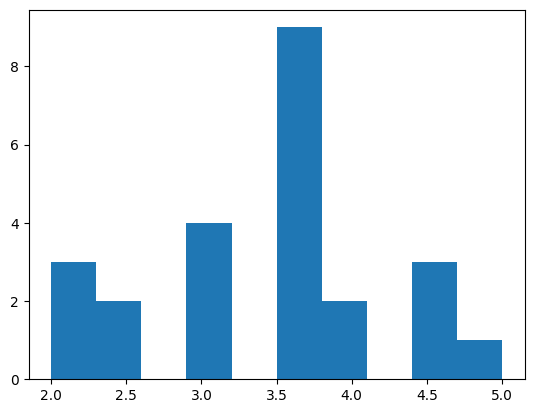

In [ ]:
plt.hist(df["engagement"])

(array([ 2.,  0.,  0.,  3.,  0.,  3., 13.,  0.,  0.,  3.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

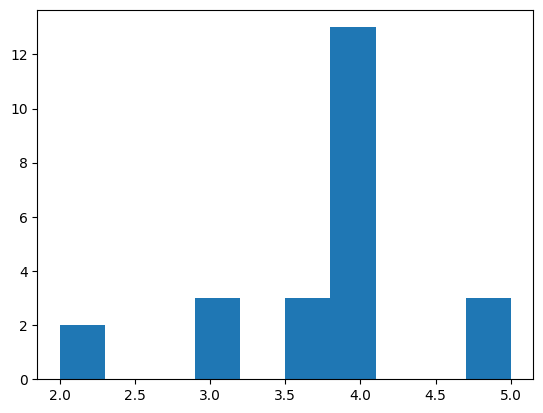

In [ ]:
plt.hist(df["ne"])

In [ ]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df, source='inviter_dec', target='recipient_dec',edge_attr=None)
dfattr = df[['recipient_dec', 'ne_bin','engagement', 'ee', 'ident',
       'nature', 'pnb', 'ne', 'engagement_bin']].set_index('recipient_dec').astype('str')
G.add_nodes_from((n, dict(d)) for n, d in dfattr.iterrows())
G.remove_edge(156253650, 156253650)
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute=None)
nx.write_pajek(G, "network.txt")

In [ ]:
ne_bin = ['ne_bin']+[int(i) for i in list(nx.get_node_attributes(G, 'ne_bin').values())]
ne = ['ne']+[i for i in list(nx.get_node_attributes(G, 'ne').values())]
with open("ne_bin.txt", 'w') as f:
    f.write("\n".join(map(str, ne_bin)))
engagement_bin = ['engagement_bin']+[int(i) for i in list(nx.get_node_attributes(G, 'engagement_bin').values())]
with open("engagement_bin.txt", 'w') as f:
    f.write("\n".join(map(str, engagement_bin)))
engagement = ['engagement']+[i for i in list(nx.get_node_attributes(G, 'engagement').values())]
ee = ['ee']+[i for i in list(nx.get_node_attributes(G, 'ee').values())]
ident = ['ident']+[i for i in list(nx.get_node_attributes(G, 'ident').values())]
nature = ['nature']+[i for i in list(nx.get_node_attributes(G, 'nature').values())]
pnb = ['pnb']+[i for i in list(nx.get_node_attributes(G, 'pnb').values())]

attrs = [engagement, ee, ident,nature, pnb]
nodes_attrs = ''
for i in range(0,len(engagement)):
  line = "\t".join(map(str, [a[i] for a in attrs]))
  nodes_attrs = nodes_attrs + line + "\n"

with open("attributes.txt", 'w') as f:
    f.write(nodes_attrs)


attrs_2 = [ne, ee, ident,nature, pnb]
nodes_attrs_2 = ''
for i in range(0,len(ne)):
  line = "\t".join(map(str, [a[i] for a in attrs_2]))
  nodes_attrs_2 = nodes_attrs_2 + line + "\n"

with open("attributes_2.txt", 'w') as f:
    f.write(nodes_attrs_2)

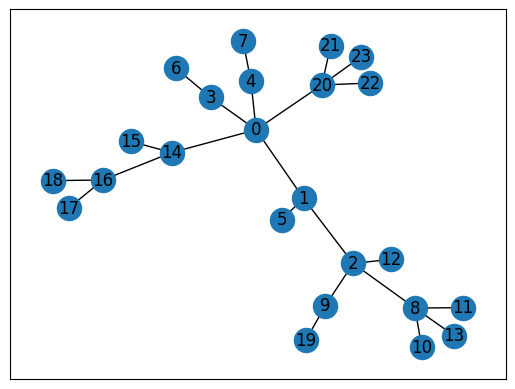

In [ ]:
nx.draw_networkx(G)
plt.show()

In [ ]:
estimateALAAMSA.run_on_network_attr(
        '/content/ALAAMEE/python/network.txt',
        [changeDensity, changeActivity, changeContagion, partial(changeoOc, "engagement"), partial(changeoOc, "ee"), partial(changeoOc, "ident"), partial(changeoOc, "nature"), partial(changeoOc, "pnb") ],
        ["Density", "Activity", "Contagion", "engagement", "ee", "ident","nature", "pnb"],
        '/content/ALAAMEE/python/ne_bin.txt',
        contattr_filename='/content/ALAAMEE/python/attributes.txt',
    )

graph nodes =  24
graph edges =  23
graph density =  0.08333333333333333
No binary attributes
Continuous attribute engagement has 0 NA values
Continuous attribute ee has 0 NA values
Continuous attribute ident has 0 NA values
Continuous attribute nature has 0 NA values
Continuous attribute pnb has 0 NA values
No categorical attributes
No snowball zones
positive outcome attribute =  66.66666666666666 %
Zobs =  [16.         32.         11.         56.         45.         57.66666667
 66.         67.        ]
Running stochastic approximation (run 1  of at most 20 )...
Phase 1 steps =  31 iters per step =  240
Zmean =  [[12.32258065 23.4516129   6.09677419 42.06451613 35.58064516 43.1827957
  47.90322581 49.51612903]]
D = 
[[ 3.3798127   7.46722164  3.06555671 11.85015609  9.71592092 11.83350676
  13.12799168 13.93028096]
 [ 7.46722164 23.86056191 10.60145682 27.7289282  21.72164412 27.84217829
  33.2049948  33.2346514 ]
 [ 3.06555671 10.60145682  6.02289282 11.18730489  9.25026015 11.68123

/content/ALAAMEE/python/gofALAAM.py:135: RuntimeWarning: invalid value encountered in divide
  tratio = (Zmean - Zobs) / Zsd


In [ ]:
estimateALAAMSA.run_on_network_attr(
        '/content/ALAAMEE/python/network.txt',
        [changeDensity, changeActivity, changeContagion, partial(changeoOc, "engagement"), partial(changeo_Oc, "engagement") ],
        ["Density", "Activity", "Contagion", "Ego's engagement", "Alters's engagement"],
        '/content/ALAAMEE/python/ne_bin.txt',
        contattr_filename='/content/ALAAMEE/python/attributes.txt'
    )

graph nodes =  24
graph edges =  23
graph density =  0.08333333333333333
No binary attributes
Continuous attribute engagement has 0 NA values
Continuous attribute ee has 0 NA values
Continuous attribute ident has 0 NA values
Continuous attribute nature has 0 NA values
Continuous attribute pnb has 0 NA values
No categorical attributes
No snowball zones
positive outcome attribute =  66.66666666666666 %
Zobs =  [ 16.   32.   11.   56.  108.5]
Running stochastic approximation (run 1  of at most 20 )...
Phase 1 steps =  22 iters per step =  240
Zmean =  [[11.63636364 21.18181818  4.95454545 39.47727273 71.90909091]]
D = 
[[  8.95867769  15.0661157    7.7107438   28.8553719   51.83057851]
 [ 15.0661157   33.51239669  17.32644628  49.7768595  117.65289256]
 [  7.7107438   17.32644628  10.77066116  25.08987603  62.42768595]
 [ 28.8553719   49.7768595   25.08987603  97.41993802 171.17975207]
 [ 51.83057851 117.65289256  62.42768595 171.17975207 418.8553719 ]]
Phase 1 took 0.1003866195678711 s
P

In [ ]:
estimateALAAMSA.run_on_network_attr(
        '/content/ALAAMEE/python/network.txt',
        [changeDensity, changeActivity, changeContagion, partial(changeoOc, "pnb"), partial(changeo_Oc, "pnb") ],
        ["Density", "Activity", "Contagion", "Ego's PNB", "Alters's PNB"],
        '/content/ALAAMEE/python/ne_bin.txt',
        contattr_filename='/content/ALAAMEE/python/attributes.txt'
    )

graph nodes =  24
graph edges =  23
graph density =  0.08333333333333333
No binary attributes
Continuous attribute engagement has 0 NA values
Continuous attribute ee has 0 NA values
Continuous attribute ident has 0 NA values
Continuous attribute nature has 0 NA values
Continuous attribute pnb has 0 NA values
No categorical attributes
No snowball zones
positive outcome attribute =  66.66666666666666 %
Zobs =  [ 16.  32.  11.  67. 132.]
Running stochastic approximation (run 1  of at most 20 )...
Phase 1 steps =  22 iters per step =  240
Zmean =  [[11.81818182 21.68181818  5.36363636 47.22727273 91.77272727]]
D = 
[[ 10.51239669  19.39669421   8.61157025  41.40495868  82.41322314]
 [ 19.39669421  41.58057851  17.9338843   76.07231405 174.2231405 ]
 [  8.61157025  17.9338843    9.23140496  33.75826446  75.03719008]
 [ 41.40495868  76.07231405  33.75826446 164.35743802 322.90392562]
 [ 82.41322314 174.2231405   75.03719008 322.90392562 732.47107438]]
Phase 1 took 0.09376335144042969 s
Phase

In [ ]:
estimateALAAMSA.run_on_network_attr(
        '/content/ALAAMEE/python/network.txt',
        [changeDensity, changeActivity, changeContagion, partial(changeoOc, "ne"), partial(changeo_Oc, "ne") ],
        ["Density", "Activity", "Contagion", "Ego's NE", "Alters's NE"],
        '/content/ALAAMEE/python/engagement_bin.txt',
        contattr_filename='/content/ALAAMEE/python/attributes_2.txt'
    )

graph nodes =  24
graph edges =  23
graph density =  0.08333333333333333
No binary attributes
Continuous attribute ne has 0 NA values
Continuous attribute ee has 0 NA values
Continuous attribute ident has 0 NA values
Continuous attribute nature has 0 NA values
Continuous attribute pnb has 0 NA values
No categorical attributes
No snowball zones
positive outcome attribute =  62.5 %
Zobs =  [ 15.  32.  11.  59. 122.]
Running stochastic approximation (run 1  of at most 20 )...
Phase 1 steps =  22 iters per step =  240
Zmean =  [[12.09090909 22.90909091  6.         45.5        87.97727273]]
D = 
[[  6.08264463  12.00826446   5.90909091  22.68181818  47.52479339]
 [ 12.00826446  36.08264463  18.45454545  45.75       139.8161157 ]
 [  5.90909091  18.45454545  10.90909091  22.90909091  71.70454545]
 [ 22.68181818  45.75        22.90909091  87.68181818 179.80681818]
 [ 47.52479339 139.8161157   71.70454545 179.80681818 544.69266529]]
Phase 1 took 0.10560154914855957 s
Phase 2 subphases =  5  it